In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Load Data

In [3]:
news = pd.read_json('../data/raw/News_Category_Dataset_v3.json', orient='records', lines=True)

display(news.head())

print(f'/n----\nShape: {news.shape}')

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


/n----
Shape: (209527, 6)


## EDA

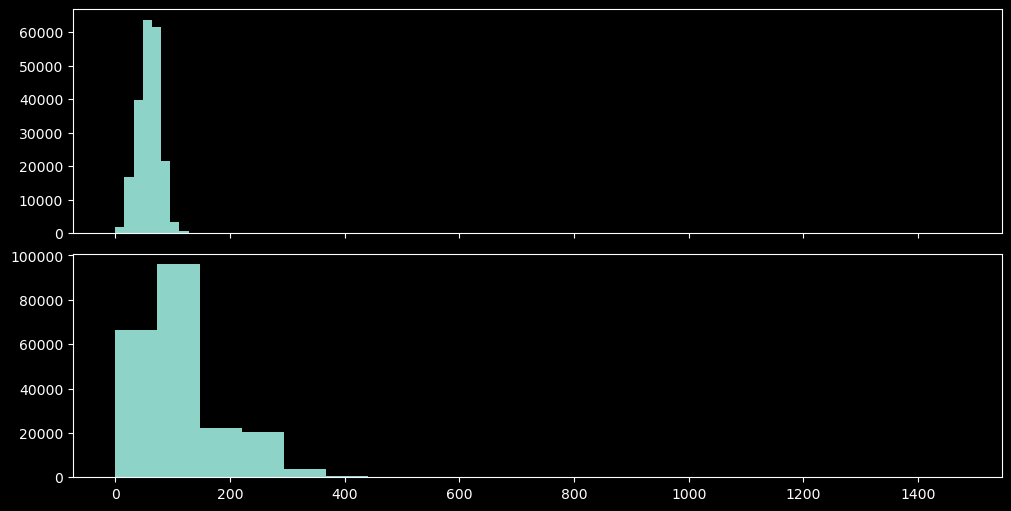

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True, layout='constrained')
ax[0].hist(pd.Series([len(x) for x in news.headline]), bins=20),
ax[1].hist(pd.Series([len(x) for x in news.short_description]), bins=20)
plt.show()

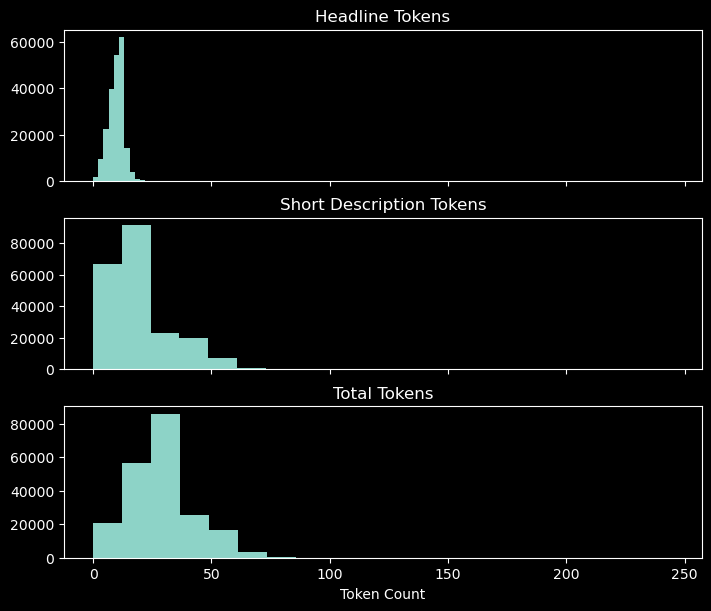

In [27]:
news['headline_tokens'] = news.headline.apply(lambda x: len(x.split()))
news['short_description_tokens'] = news.short_description.apply(lambda x: len(x.split()))
news['total_tokens'] = news.headline_tokens + news.short_description_tokens

fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True, layout='constrained')
ax[0].hist(news.headline_tokens, bins=20)
ax[0].set_title('Headline Tokens')
ax[1].hist(news.short_description_tokens, bins=20)
ax[1].set_title('Short Description Tokens')
ax[2].hist(news.total_tokens, bins=20)
ax[2].set_title('Total Tokens')
ax[2].set_xlabel('Token Count')
plt.show()

In [6]:
news.total_tokens.describe()

count    209527.000000
mean         29.269770
std          13.803927
min           0.000000
25%          20.000000
50%          28.000000
75%          35.000000
max         245.000000
Name: total_tokens, dtype: float64

In [7]:
print(
    f'Number of unique categories: {len(news.category.unique())}',
    f'/nNumber of unique authors: {len(news.authors.unique())}',
    f'/nNumber of unique dates: {len(news.date.unique())}',
)

Number of unique categories: 42 /nNumber of unique authors: 29169 /nNumber of unique dates: 3890


category
POLITICS          0.169916
WELLNESS          0.085645
ENTERTAINMENT     0.082863
TRAVEL            0.047249
STYLE & BEAUTY    0.046839
PARENTING         0.041956
HEALTHY LIVING    0.031948
QUEER VOICES      0.030292
FOOD & DRINK      0.030259
BUSINESS          0.028598
COMEDY            0.025772
SPORTS            0.024231
BLACK VOICES      0.021873
HOME & LIVING     0.020618
PARENTS           0.018876
THE WORLDPOST     0.017487
WEDDINGS          0.017435
WOMEN             0.017048
CRIME             0.017000
IMPACT            0.016628
DIVORCE           0.016351
WORLD NEWS        0.015745
MEDIA             0.014051
WEIRD NEWS        0.013254
GREEN             0.012514
WORLDPOST         0.012309
RELIGION          0.012299
STYLE             0.010758
SCIENCE           0.010528
TECH              0.010042
TASTE             0.010003
MONEY             0.008381
ARTS              0.007202
ENVIRONMENT       0.006892
FIFTY             0.006686
GOOD NEWS         0.006672
U.S. NEWS         0

C:\Users\Keith\AppData\Local\Temp\ipykernel_23420\2086766756.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(news.category.value_counts().index, rotation=70)


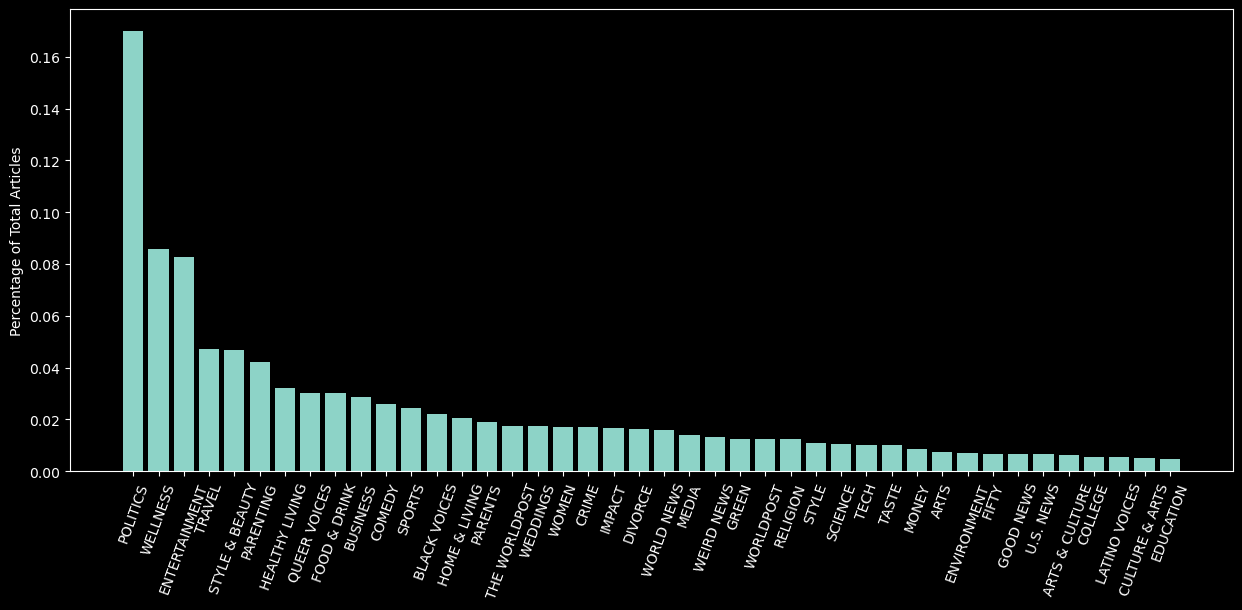

In [28]:
print(news.category.value_counts(normalize=True))

fig, ax = plt.subplots(figsize = (15, 6))
ax.bar(
    news.category.value_counts().index,
    news.category.value_counts().values / news.shape[0]
)
ax.set_xticklabels(news.category.value_counts().index, rotation=70)
ax.set_ylabel('Percentage of Total Articles')
plt.show()

C:\Users\Keith\AppData\Local\Temp\ipykernel_23420\2365507036.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(news.grouped_category.value_counts().index, rotation=60)


grouped_category
Politics              0.173371
Entertainment         0.125180
Wellness              0.087387
Diversity             0.076123
Parenting             0.062069
Home & Health         0.060457
Style & Beauty        0.058767
General News          0.053172
Travel                0.048210
Food & Drink          0.041081
Business              0.037730
Sports                0.024723
Science & Religion    0.023292
Environment           0.019800
Arts and Culture      0.019099
Weddings              0.017789
Crime                 0.017346
Other                 0.016966
Divorce               0.016684
Education             0.010509
Tech                  0.010246
Name: proportion, dtype: float64


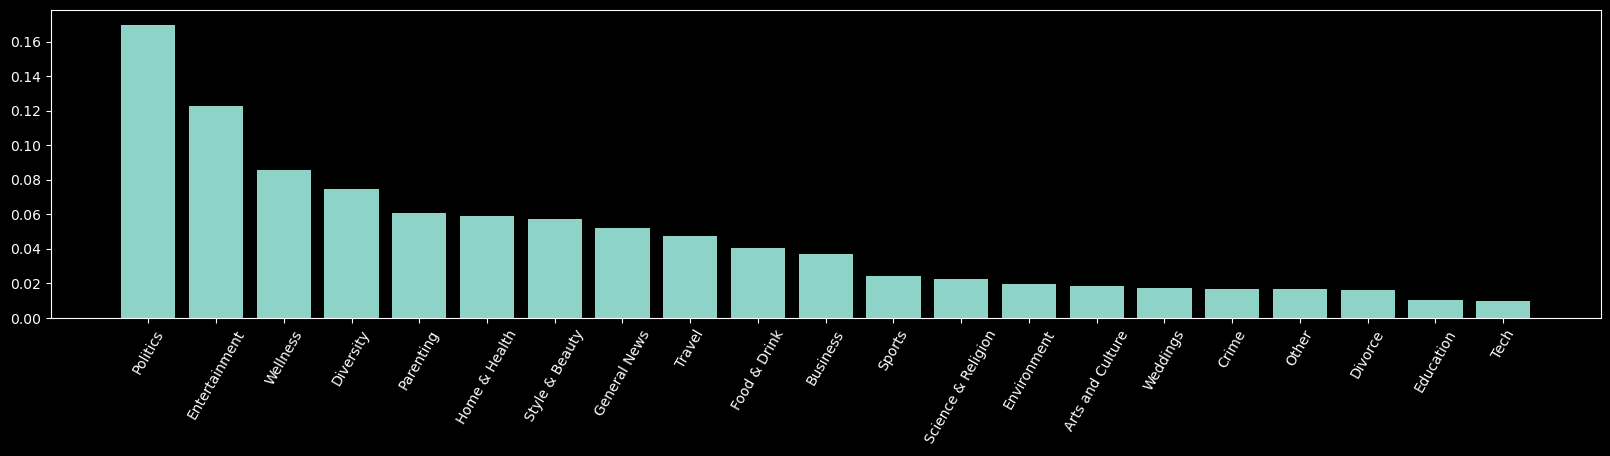

In [9]:
consolidated_categories = {
    'Diversity': ['BLACK VOICES', 'LATINO VOICES', 'QUEER VOICES', 'WOMEN'],
    'Politics': ['POLITICS'],
    'Divorce': ['DIVORCE'],
    'Weddings': ['WEDDINGS'],
    'Home & Health': ['HOME & LIVING', 'HEALTHY LIVING', 'FIFTY'],
    'Travel': ['TRAVEL'],	
    'Style & Beauty': ['STYLE & BEAUTY', 'STYLE'],
    'Food & Drink': ['FOOD & DRINK', 'TASTE'],
    'Sports': ['SPORTS'],
    'Entertainment': ['ENTERTAINMENT', 'MEDIA', 'COMEDY'],
    'Wellness': ['WELLNESS'],
    'General News': ['WORLD NEWS', 'U.S. NEWS', 'WORLDPOST', 'THE WORLDPOST'],
    'Parenting': ['PARENTING', 'PARENTS'],
    
    'Other': ['IMPACT'],
    'Education': ['EDUCATION', 'COLLEGE'],
    'Crime': ['CRIME'],
    'Arts and Culture': ['ARTS', 'ARTS & CULTURE', 'CULTURE & ARTS'],
    'Environment': ['ENVIRONMENT', 'GREEN'],
    'Science & Religion': ['RELIGION', 'SCIENCE'],
    'Business': ['BUSINESS', 'MONEY'],
    'Tech': ['TECH']
}

# Invert the dictionary to map each old label to its new, consolidated label
category_mapping = {old_label: new_label for new_label, old_labels in consolidated_categories.items() for old_label in old_labels}

# Apply the mapping to the 'news' DataFrame as before
news['grouped_category'] = news['category'].map(category_mapping)

print(news['grouped_category'].value_counts(normalize=True))

fig, ax = plt.subplots(figsize = (20, 4))
ax.bar(
    news.grouped_category.value_counts().index,
    news.grouped_category.value_counts().values / news.shape[0]
)
ax.set_xticklabels(news.grouped_category.value_counts().index, rotation=60)
plt.show()

In [10]:
consol_list = []

for x in consolidated_categories.values():
    consol_list.extend(x)

print(
    f'Original List: {len(news.category.unique())}'
    f'/nConsolidated List: {len(consol_list)}'
    f'/nMissing from original: {[x for x in news.category.unique() if x not in consol_list]}'
    f'/nMissing from consolidated: {[x for x in consol_list if x not in news.category.unique()]}'
)

Original List: 42/nConsolidated List: 40/nMissing from original: ['WEIRD NEWS', 'GOOD NEWS']/nMissing from consolidated: []


In [11]:
import sys
sys.path.insert(0, '../scripts')
from utils import back_translate

import torch

import transformers
from transformers import pipeline
transformers.logging.set_verbosity_error()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

backtranslated_text = back_translate(news.headline[0], device, MAX_LENGTH=64)

c:\Users\Keith\miniconda3\envs\cuny\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Keith\miniconda3\envs\cuny\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
c:\Users\Keith\miniconda3\envs\cuny\Lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [12]:
backtranslated_text

['More than 4 million Americans roll the sleeves for VOCID boosters at OGRON-Targeted']

In [13]:
import sys
sys.path.append('../scripts')
from utils import random_delete, random_replace

In [14]:
random_delete(news.headline[0:100])

['Over 4 Million Americans Roll Up   Omicron-Targeted COVID ',
 'American Airlines  Charged,  For Life After Punching Flight Attendant On ',
 '23 Of The Funniest  About Cats And Dogs This  (Sept. ',
 'The  Tweets From Parents This Week (Sept. ',
 'Woman Who Called Cops  Black Bird-Watcher Loses  Against Ex-Employer',
 'Cleaner Was Dead In Belk  For 4 Days Before Body Found: Police',
 ' Gets Adorable Surprise  Her  While Live On TV',
 'Puerto Ricans Desperate For Water After Hurricane Fiona’s Rampage',
 'How A  Documentary Captures The Complexity Of  A   ',
 "Biden At UN To Call Russian  An Affront To Body's Charter",
 ' Cup Captains Want To Wear Rainbow  In Qatar',
 "  Himself On Fire In Apparent Protest Of Funeral For Japan's Abe",
 'Fiona Threatens   Category  Storm Headed  Bermuda',
 'Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000',
 'Virginia Thomas Agrees To Interview With Jan. 6 Panel',
 'Russian Cosmonaut Valery Polyakov Who Broke Record With 437-Day  In S

In [15]:
random_replace(news.headline[0:100])

[' Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters',
 ' American Airlines Flyer Charged, Banned For Life After Punching Flight attendee On Video',
 ' xxiii Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)',
 ' The Funniest Tweets From Parents This Week (Sept. 17-23)',
 ' Woman WHO Called Cops On Black Bird-Watcher suffer Lawsuit Against Ex-Employer',
 ' Cleaner Was Dead IN Belk bathroom For 4 Days earlier Body Found: Police',
 ' Reporter Gets Adorable Surprise From Her Boyfriend While Live On video',
 ' Puerto Ricans despairing For piddle After hurricane Fiona’s Rampage',
 ' How A New Documentary capture The Complexity Of Being A Child Of Immigrants',
 " Biden At UN To hollo Russian War AN Affront To Body's Charter",
 " World Cup maitre_d' Want To Wear rainbow Armbands in Qatar",
 " Man Sets Himself on Fire In Apparent Protest Of funeral For Japan's Abe",
 ' Fiona threaten To Become category 4 Storm Headed To Bermuda',
 ' Twitch Bans Gambl

In [16]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import numpy as np
from itertools import chain

text = news.headline[0]
altered_text = ''
for word in text.split():
    if np.random.random() < 0.3:
        synonyms = set(chain.from_iterable([syn.lemma_names() for syn in wordnet.synsets(word)]))
        word = np.random.choice(list(synonyms)) if synonyms else word
    altered_text += ' ' + word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Keith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
